In [1]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('liar_dataset/train.tsv', sep='\t')
val_df = pd.read_csv('liar_dataset/valid.tsv', sep='\t')
test_df = pd.read_csv('liar_dataset/test.tsv', sep='\t')

In [2]:
valid_df = pd.concat([val_df, test_df])

In [3]:
# checkfor null values
train_df['statement'].isnull().sum()

0

In [4]:
valid_df['statement'].isnull().sum()

0

In [5]:
len(valid_df)

2551

In [6]:
len(train_df)
len(test_df)

1267

In [7]:
display(train_df)


,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report"""
10236,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview
10237,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate
10238,2253.json,FALSE,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...


In [8]:
train_df.shape


(10240, 14)

In [9]:
test_df.shape


(1267, 14)

In [10]:
valid_df.shape

(2551, 14)

In [11]:
# remove "barely true" and "half true" labels
valid_df = valid_df[valid_df['label'] != 'half-true']
len(valid_df)

2038

In [12]:
valid_df = valid_df[valid_df['label'] != 'barely-true']
len(valid_df)

1589

In [13]:
train_df = train_df[train_df['label'] != 'half-true']
len(train_df)

8126

In [14]:
train_df = train_df[train_df['label'] != 'barely-true']

In [15]:
true_train_df = pd.concat([train_df[train_df['label'] == 'mostly-true'], train_df[train_df['label'] == 'true']])

In [16]:
fake_train_df = pd.concat([train_df[train_df['label'] == 'false'], train_df[train_df['label'] == 'pants-fire']])

In [17]:
true_valid_df = pd.concat([valid_df[valid_df['label'] == 'mostly-true'], valid_df[valid_df['label'] == 'true']])
fake_valid_df = pd.concat([valid_df[valid_df['label'] == 'false'], valid_df[valid_df['label'] == 'pants-fire']])

In [18]:
true_train_df.label = 1
true_valid_df.label = 1

fake_train_df.label = 0
fake_valid_df.label = 0

train_df = pd.concat([true_train_df, fake_train_df])
val_df = pd.concat([true_valid_df, fake_valid_df])

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [19]:
df = pd.concat([train_df, val_df])

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# inspect length of news
titles = [text for text in df.statement]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)
    
print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 3501
Max length of the titles: 467
Mean length of the titles: 18.12710654098829


C:\Users\mdash\AppData\Local\Temp\ipykernel_6892\1580412618.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=50)


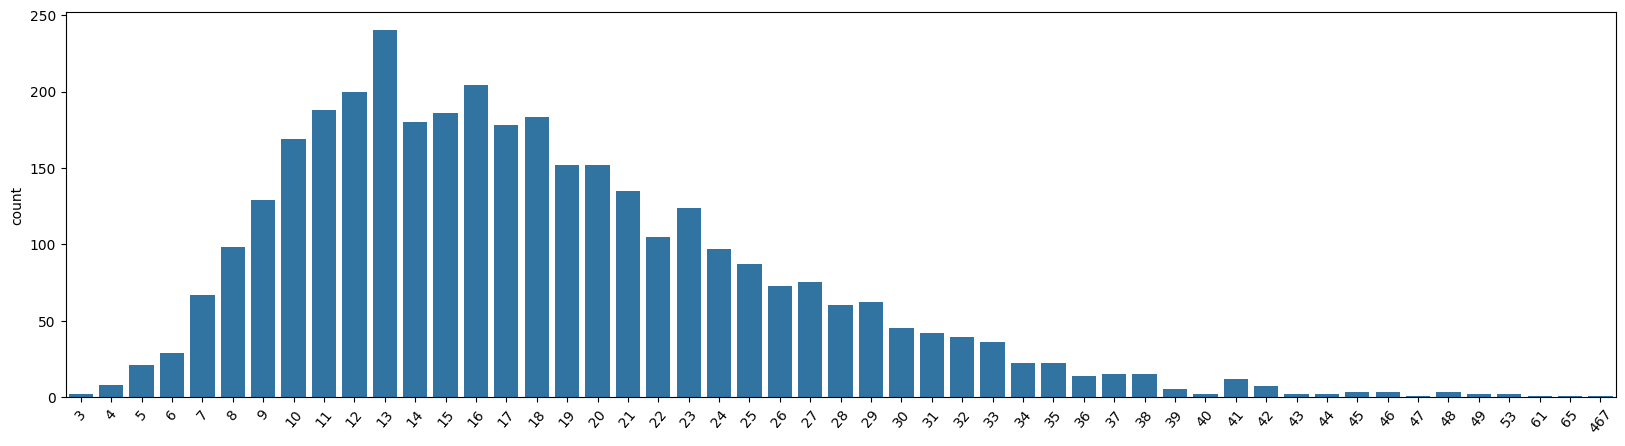

In [21]:
plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [22]:
# remove statements longer than 96 words for CT-BERT
len(train_df)

2801

In [23]:
for i in range(len(train_df)):
    row = train_df.loc[i]
    if len(row.statement.split()) > 95:
        train_df = train_df.drop(i)

In [24]:
len(train_df)

2800

In [25]:
len(val_df)

700

In [26]:
for i in range(len(val_df)):
    row = val_df.loc[i]
    if len(row.statement.split()) > 95:
        val_df = val_df.drop(i)

In [27]:
len(val_df)

700

In [28]:
df = pd.concat([train_df, val_df])

# inspect length of news
titles = [text for text in df.statement]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)
    
print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 3500
Max length of the titles: 65
Mean length of the titles: 17.998857142857144


In [29]:
# purify and shuffle the DataFrames
from sklearn.utils import shuffle

# purify
train_df = train_df.iloc[:, [1,2]]
val_df = val_df.iloc[:, [1,2]]

# shuffle
train_df = shuffle(train_df).reset_index(drop=True)
val_df = shuffle(val_df).reset_index(drop=True)

In [30]:
# DataFrame to csv
train_df = train_df
val_df = val_df

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)

train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)

trainset size: (2800, 2)
valset size: (700, 2)


In [31]:
display(train_df)

,label,statement
0,1,"Under federal law, Jared Loughner would not ha..."
1,1,Barack Obamas health care bill is nothing new....
2,1,The DREAM Act was written by members of both p...
3,1,Says new EPA water regulations would force the...
4,0,No one in American history has moved from a Ju...
...,...,...
2795,1,Amajority of the men and women on this stage h...
2796,1,"Almost 100,000 people left Puerto Rico last year."
2797,1,Weve dedicated more money from (Washington Cou...
2798,0,President Obama . . . wants to mandate circumc...
